In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
from matplotlib import pyplot as plt
import datetime
%matplotlib inline


In [2]:
mlp.rcParams["figure.facecolor"] = "white"
mlp.rcParams["axes.facecolor"] = "white"

In [3]:
scoos = pd.read_csv("../data/SCOOS_Harmful_Algal_Blooms_1916-2019.csv", skiprows= 7, encoding="latin-1")

In [4]:
print("\n".join(scoos.columns))

year
month
day
time
latitude
longitude
depth (m)
location
Akashiwo sanguinea (cells/L)
Alexandrium spp. (cells/L)
Ammonia (uM)
Chlorophyll (mg/m3)
Chlorophyll 1 (mg/m3)
Chlorophyll 2 (mg/m3)
DA Volume Filtered (mL)
Dinophysis spp. (cells/L)
Domoic Acid (ng/mL)
Lingulodinium polyedrum (cells/L)
Nitrate (uM)
Nitrite (uM)
Other Diatoms (cells/L)
Other Dinoflagellates (cells/L)
Phaeophytin (mg/m3)
Phaeophytin 1 (mg/m3)
Phaeophytin 2 (mg/m3)
Phosphate (uM)
Prorocentrum spp. (cells/L)
Pseudo-nitzschia delicatissima group (cells/L)
Pseudo-nitzschia seriata group (cells/L)
Silicate (uM)
Volume Settled for counting (mL)
Water Temperature (°C)
Volume for counting (mL)


In [5]:
scoos.head()

,year,month,day,time,latitude,longitude,depth (m),location,Akashiwo sanguinea (cells/L),Alexandrium spp. (cells/L),...,Phaeophytin 1 (mg/m3),Phaeophytin 2 (mg/m3),Phosphate (uM),Prorocentrum spp. (cells/L),Pseudo-nitzschia delicatissima group (cells/L),Pseudo-nitzschia seriata group (cells/L),Silicate (uM),Volume Settled for counting (mL),Water Temperature (°C),Volume for counting (mL)
0,1969,12,31,23:59:59,33.606100,-117.931100,0.0,Newport Pier,0.0,0.0,...,NaN,NaN,0.310,5200.0,5200.0,15599.0,NaN,25.0,18.0,NaN
1,1969,12,31,23:59:59,34.408000,-119.685000,0.0,Stearns Wharf,0.0,0.0,...,0.58,NaN,1.102,2552.0,1392.0,0.0,6.562,50.0,NaN,NaN
2,1969,12,31,23:59:59,36.603686,-121.889271,0.0,Monterey Wharf,0.0,858.0,...,NaN,NaN,NaN,17503.0,1500.0,5574.0,NaN,NaN,NaN,NaN
3,1969,12,31,23:59:59,34.408000,-119.685000,0.0,Stearns Wharf,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969,12,31,23:59:59,34.008000,-118.499000,0.0,Santa Monica Pier,748.0,0.0,...,NaN,NaN,NaN,2992.0,0.0,7480.0,NaN,NaN,16.8,NaN


In [6]:
scoos["depth (m)"].value_counts()

0.0    3599
Name: depth (m), dtype: int64

In [7]:
scoos["date"] = scoos.apply(lambda x: datetime.datetime(x.year, x.month, x.day),axis=1)

0

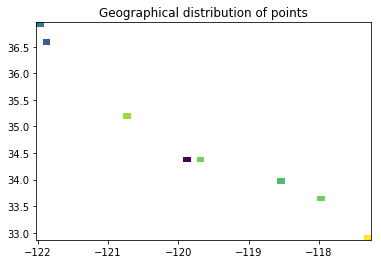

In [8]:
plt.hist2d(scoos.longitude, scoos.latitude, bins=50, cmin=1)
plt.title("Geographical distribution of points")
0

In [9]:
scoos["Date"] = pd.to_datetime(scoos.apply(lambda x: str(x.year)+"-"+str(x.month)+"-"+str(x.day), axis=1))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of SCOOS data points over time')

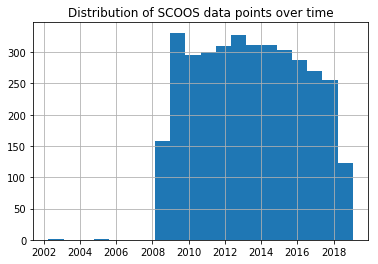

In [10]:
scoos[scoos.Date > pd.to_datetime("2002-01-01")].Date.hist(bins=20)
plt.title("Distribution of SCOOS data points over time")

In [11]:
# Unique dates:
scoos.Date.unique().shape

(1596,)

In [12]:
scoos[scoos.Date > pd.to_datetime("2008-01-01")].Date.map(lambda x: x.year*100+x.month).value_counts().sort_index().head()

200806     4
200807    21
200808    23
200809    28
200810    29
Name: Date, dtype: int64

In [13]:
(pd.cut(scoos.latitude,100).astype(str) + pd.cut(scoos.longitude,100).astype(str)).value_counts()

(32.863, 32.908](-117.305, -117.257]    664
(35.158, 35.199](-120.779, -120.732]    587
(34.381, 34.422](-119.732, -119.685]    549
(33.603, 33.644](-117.971, -117.923]    547
(33.972, 34.012](-118.542, -118.495]    505
(36.917, 36.958](-122.022, -121.969]    354
(36.59, 36.631](-121.922, -121.874]     276
(34.381, 34.422](-119.875, -119.827]    117
dtype: int64

In [14]:
len(scoos.latitude.unique()), len(scoos.longitude.unique())

(8, 8)

In [50]:
locations = scoos.groupby(["latitude", "longitude", "location"]).apply(len)
locations

latitude   longitude    location         
32.867000  -117.257000  Scripps Pier         664
33.606100  -117.931100  Newport Pier         547
34.008000  -118.499000  Santa Monica Pier    505
34.408000  -119.685000  Stearns Wharf        549
34.416108  -119.828749  Goleta Pier          117
35.170000  -120.741000  Cal Poly Pier        587
36.603686  -121.889271  Monterey Wharf       276
36.958000  -122.017000  Santa Cruz Wharf     354
dtype: int64

In [47]:
scoos[["Domoic Acid (ng/mL)", "Nitrate (uM)", "Nitrite (uM)", "Akashiwo sanguinea (cells/L)", 
"Alexandrium spp. (cells/L)", 
"Ammonia (uM)",
"Chlorophyll (mg/m3)",
"Dinophysis spp. (cells/L)",
"Lingulodinium polyedrum (cells/L)",
"Other Diatoms (cells/L)",
"Other Dinoflagellates (cells/L)",
"Phaeophytin (mg/m3)",
"Phaeophytin 1 (mg/m3)",
"Phaeophytin 2 (mg/m3)",
"Phosphate (uM)",
"Prorocentrum spp. (cells/L)",
"Pseudo-nitzschia delicatissima group (cells/L)",
"Pseudo-nitzschia seriata group (cells/L)",
"Silicate (uM)",
"Water Temperature (°C)"
]].corr()

,Domoic Acid (ng/mL),Nitrate (uM),Nitrite (uM),Akashiwo sanguinea (cells/L),Alexandrium spp. (cells/L),Ammonia (uM),Chlorophyll (mg/m3),Dinophysis spp. (cells/L),Lingulodinium polyedrum (cells/L),Other Diatoms (cells/L),Other Dinoflagellates (cells/L),Phaeophytin (mg/m3),Phaeophytin 1 (mg/m3),Phaeophytin 2 (mg/m3),Phosphate (uM),Prorocentrum spp. (cells/L),Pseudo-nitzschia delicatissima group (cells/L),Pseudo-nitzschia seriata group (cells/L),Silicate (uM),Water Temperature (°C)
Domoic Acid (ng/mL),1.000000,0.134209,0.327179,-0.025142,-0.016224,-0.008260,0.051057,-0.005771,-0.027566,-0.041723,0.029719,0.124690,0.122938,-0.077988,-0.003195,0.098751,0.005450,0.519376,0.026340,-0.071770
Nitrate (uM),0.134209,1.000000,0.081319,-0.040798,0.074247,0.027187,-0.010403,-0.053692,-0.050193,-0.042850,-0.007240,0.092456,0.098217,0.061664,0.096955,-0.011311,-0.002900,0.117873,0.480835,-0.414416
Nitrite (uM),0.327179,0.081319,1.000000,0.016288,0.028190,-0.000072,0.127655,0.198237,-0.008374,-0.036940,0.024815,0.145083,0.131989,0.138771,0.392368,0.010454,-0.018381,0.034512,0.056402,-0.107802
Akashiwo sanguinea (cells/L),-0.025142,-0.040798,0.016288,1.000000,0.009456,-0.023362,0.319409,0.045487,0.013496,-0.037893,0.119641,0.105654,0.076966,0.111598,0.035594,0.017203,0.012380,-0.017361,-0.014087,-0.061054
Alexandrium spp. (cells/L),-0.016224,0.074247,0.028190,0.009456,1.000000,0.009158,0.014538,0.073684,-0.001917,0.003461,0.058693,0.013226,0.011120,0.017200,0.031510,0.037925,-0.008887,0.070993,0.039630,-0.031898
Ammonia (uM),-0.008260,0.027187,-0.000072,-0.023362,0.009158,1.000000,-0.012992,0.084594,-0.020934,-0.001093,0.074073,-0.002887,-0.001506,0.131081,0.005245,-0.013357,0.063070,-0.001151,0.008497,-0.006371
Chlorophyll (mg/m3),0.051057,-0.010403,0.127655,0.319409,0.014538,-0.012992,1.000000,0.144170,0.165336,0.143182,0.407425,0.583611,0.530440,0.559729,0.108757,0.062226,0.040806,0.264474,0.131746,-0.179136
Dinophysis spp. (cells/L),-0.005771,-0.053692,0.198237,0.045487,0.073684,0.084594,0.144170,1.000000,0.060355,-0.018346,0.280014,0.163903,0.152955,0.163038,0.169187,0.160731,0.024636,-0.011215,0.030255,-0.012961
Lingulodinium polyedrum (cells/L),-0.027566,-0.050193,-0.008374,0.013496,-0.001917,-0.020934,0.165336,0.060355,1.000000,-0.040500,0.031224,0.052256,-0.000755,0.067898,0.010906,0.049948,-0.006829,-0.023106,-0.025728,0.048985
Other Diatoms (cells/L),-0.041723,-0.042850,-0.036940,-0.037893,0.003461,-0.001093,0.143182,-0.018346,-0.040500,1.000000,-0.011659,0.270750,0.267016,0.217169,-0.039810,-0.005967,0.178307,0.083683,0.023692,-0.067859


# MODIS Data

In [16]:
import os
import xarray as xa

In [17]:
def processTimeseries(xa):
    resample = xa.resample(date='1M')
    monthlymeans = resample.reduce(np.nanmean, dim="date")

    monthlystd = resample.reduce(np.nanstd, dim="date")
    monthlyn = resample.reduce(countNotNas, dim="date")
    stderr = 2* monthlystd / np.sqrt(monthlyn)

    return resample, monthlystd, monthlyn, stderr

def plotTimeseries(lat,lon, color, label, xa = None, monthlymeans = None, stderr = None, plotPoints = True):
    if xa is not None and monthlymeans is None:
        print("Processing input array")
        resample, monthlymeans, monthlyn, stderr = processTimeseries(xa)
        
    x = monthlymeans.indexes["date"]
    y = monthlymeans.sel(lat = lat, lon=lon, method="nearest").values
    err = stderr.sel(lat = lat, lon=lon, method="nearest").values

    if plotPoints:
        plt.plot(xa.date.values, xa.sel(lat = lat, lon=lon, method="nearest").values, marker="o", color=color, alpha=0.2)

    plt.plot(x, monthlymeans.sel(lat = lat, lon=lon, method="nearest").values, marker="o", color=color, label=label)
    plt.fill_between(x, y+err, y-err, color=color, alpha=0.2)

    plt.xticks(x, x.map(lambda x: x.year *100 + x.month), rotation=90)
    plt.xlabel("Fecha")

def countNotNas(d,axis):
    return np.sum(np.isnan(d)==False, axis=axis)


In [18]:
# Leyendo 2018
datapath = "../../CaliforniaData/output/"
i = 0
dsAChl = []
for filename in os.listdir(datapath):
    if "chlor_a" in filename and "MODA" in filename: 
        dataset = xa.open_dataset(datapath + filename)
        dsAChl.append(dataset)
        i += 1
datapath = "../../CaliforniaData/output/"
i = 0
dsTChl = []
for filename in os.listdir(datapath):
    if "chlor_a" in filename and "MODT" in filename: 
        dataset = xa.open_dataset(datapath + filename)
        dsTChl.append(dataset)
        i += 1

dsAChl = sorted(dsAChl, key= lambda x: int(x.attrs["product_name"][1:8]) ) 
dsTChl = sorted(dsTChl, key= lambda x: int(x.attrs["product_name"][1:8]) ) 
xa_Achl = xa.concat([x["chlor_a"] for x in dsAChl], pd.Index(data = pd.to_datetime([x.attrs["time_coverage_start"][0:10] for x in dsAChl]), name="date" ) )
xa_Tchl = xa.concat([x["chlor_a"] for x in dsTChl], pd.Index(data = pd.to_datetime([x.attrs["time_coverage_start"][0:10] for x in dsTChl]), name="date" ) )


In [62]:
# stearns wharf
lat,lon = (34.408,-119.685)

date  Alexandrium spp. (cells/L)
year month                                       
2017 1     2017-01-02                        0.00
     2     2017-02-06                        0.00
     3     2017-03-07                        0.00
     4     2017-04-03                        0.00
     5     2017-05-01                     2413.00
     6     2017-06-06                        0.00
     7     2017-07-03                        0.00
     8     2017-08-07                        0.00
     9     2017-09-04                        0.00
     10    2017-10-03                      185.60
     11    2017-11-06                      232.00
     12    2017-12-05                      464.00
2018 1     2018-01-02                        0.00
     2     2018-02-05                     4628.00
     3     2018-03-05                        0.00
     4     2018-04-02                     1968.60
     5     2018-05-07                     3375.00
     6     2018-06-04                      723.75
     7     2018-07-02                     1158.00
     8     2018-08-06                      217.25

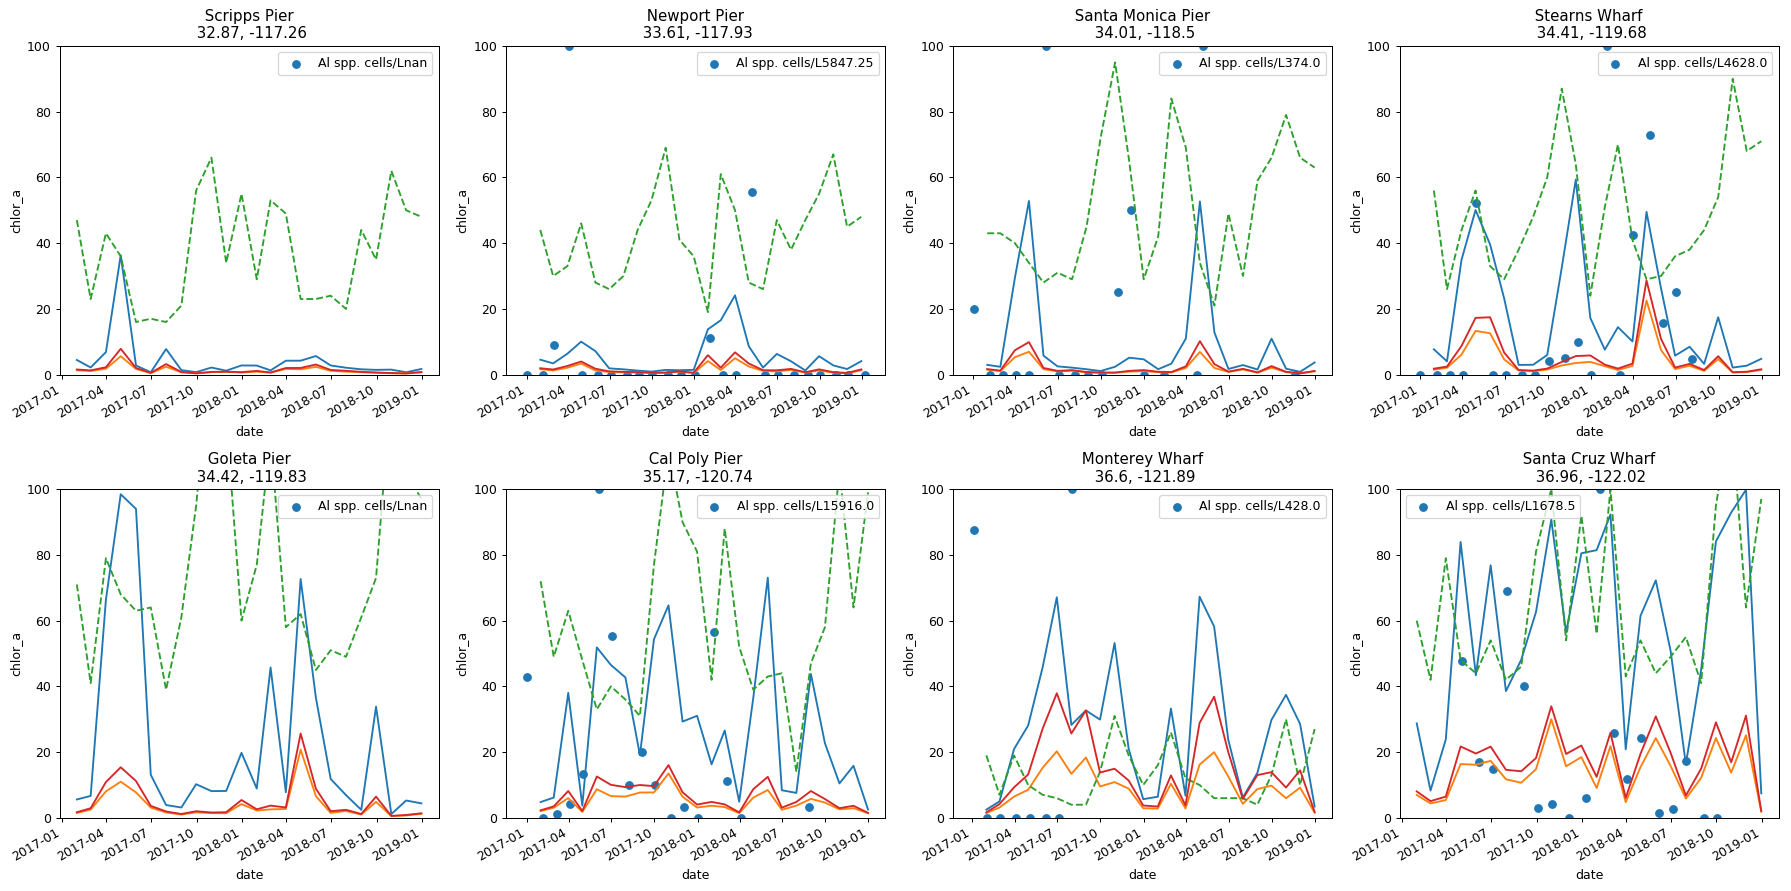

In [122]:
mlp.rcParams["figure.figsize"] = (20,10)
for i, row in locations.reset_index().iterrows():
    lat, lon = (row.latitude, row.longitude)
    plt.subplot(2, np.ceil(len(locations)/2), i+1)
    x = xa_Achl.sel(lat=slice(lat+0.08, lat-0.08), lon=slice(lon-0.08, lon+0.08)).sortby("date").resample(date = "1M")
    monthAmax = x.reduce(np.nanmax)
    monthns = x.reduce(countNotNas, dim="date").groupby("date").sum(skipna="True")
    monthAste = 2* x.reduce(np.nanstd) / np.sqrt(monthns)
    monthAmean = x.reduce(np.nanmean)
    monthAmax.plot()
    monthAmean.plot()
    monthns.plot(linestyle="--")
    sctemp = scoos[(scoos.location==row.location) & (scoos["Date"]>pd.to_datetime("2017-01-01"))].groupby(["year", "month"]).agg({"date": "min", "Alexandrium spp. (cells/L)": "mean"})
    plt.scatter(sctemp.date, 100*sctemp["Alexandrium spp. (cells/L)"]/sctemp["Alexandrium spp. (cells/L)"].max(), label="Al spp. cells/L{}".format(sctemp["Alexandrium spp. (cells/L)"].max()))
    plt.legend()
    plt.ylim((0,100))
    (monthAste + monthAmean).plot()
    plt.title(" {} \n {}, {}".format(row.location, np.round(lat, 2), np.round(lon, 2)))
plt.tight_layout()

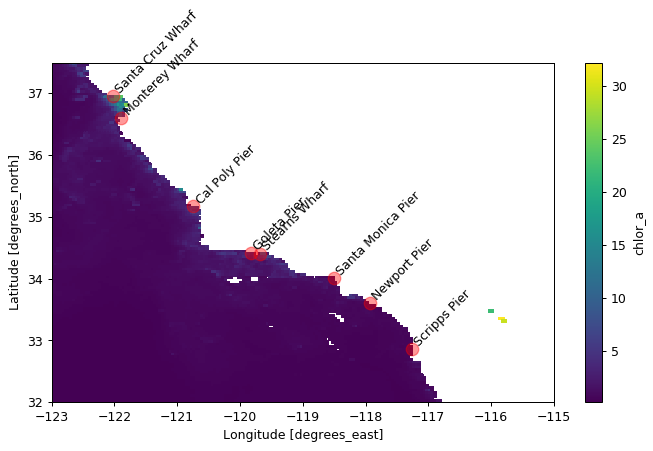

In [104]:
mlp.rcParams["figure.figsize"] = (9,5)
ax = plt.subplot(1,1,1)
xa_Achl.sel(date=slice(pd.to_datetime("2017-11-15"), pd.to_datetime("2017-12-31")), lat=slice(40,32), lon=slice(-150,-115)).reduce(np.nanmean, dim=["date"]).plot(ax = ax)
ax.scatter(locations.longitude, locations.latitude, s=100, c="red", alpha = 0.4)
for i, row in locations.iterrows():
    ax.text(row.longitude, row.latitude, row.location, rotation=45, horizontalalignment="left", verticalalignment="bottom")

In [25]:
# Esto consume mucha memoria
rAchl, mmAchl, mnAchl, mstdAchl = processTimeseries(xa_Achl.sortby("date" ))
rTchl, mmTchl, mnTchl, mstdTchl = processTimeseries(xa_Tchl.sortby("date"))

/usr/local/lib/python3.6/dist-packages/xarray/core/variable.py:1371: RuntimeWarning: Mean of empty slice
  data = func(input_data, axis=axis, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [30]:
mmAchl

<xarray.DataArray 'chlor_a' (date: 24, lat: 456, lon: 720)>
array([[[1.617828e+00, 6.031658e-01, ...,          nan,          nan],
        [1.924816e+00, 1.890509e+00, ...,          nan,          nan],
        ...,
        [1.780612e-02, 1.685826e-02, ..., 7.418329e-01, 7.377132e-01],
        [2.272905e-02, 2.343569e-02, ..., 6.563501e-01, 7.282602e-01]],

       [[1.540504e+00, 1.536534e+00, ...,          nan,          nan],
        [1.791361e+00, 1.580341e+00, ...,          nan,          nan],
        ...,
        [4.889749e-03, 4.738255e-03, ..., 6.908560e-01, 7.260564e-01],
        [4.889896e-03, 4.739794e-03, ..., 5.439996e-01, 6.792067e-01]],

       ...,

       [[4.560298e+00, 7.492517e+00, ...,          nan,          nan],
        [8.361952e+00, 1.063647e+01, ...,          nan,          nan],
        ...,
        [2.064870e-02, 1.858884e-02, ..., 1.684572e+00, 1.771135e+00],
        [2.083415e-02, 2.156625e-02, ..., 1.916871e+00, 2.350769e+00]],

       [[1.728678e-01, 2.26326

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


(0, 70)

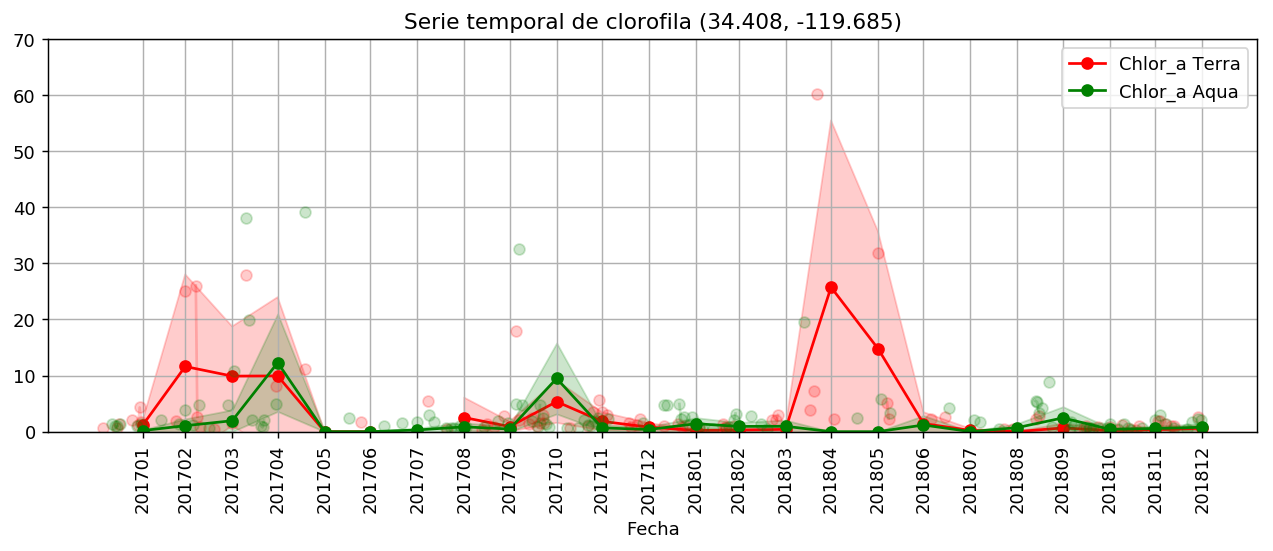

In [31]:

plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams["figure.dpi"] = 130

plotTimeseries(lat,lon, "red", "Chlor_a Terra", monthlymeans=mmTchl, stderr=mstdTchl, xa = xa_Tchl)
plotTimeseries(lat,lon, "green", "Chlor_a Aqua", monthlymeans=mmAchl, stderr=mstdAchl, xa = xa_Achl)

plt.legend(loc="best")
plt.grid("on")
plt.title("Serie temporal de clorofila ({}, {})".format(lat,lon))
#plt.yscale("symlog")
plt.ylim([0,70])

In [32]:
mmAchl.sel(lat = lat, lon=lon, method="nearest").values

array([ 0.18988198,  1.0576707 ,  1.9472172 , 12.299599  ,  0.        ,
        0.        ,  0.29221782,  0.86184186,  0.46033624,  9.487573  ,
        0.67552316,  0.380435  ,  1.4162061 ,  0.9314665 ,  0.9538414 ,
        0.        ,  0.        ,  1.1850173 ,  0.        ,  0.7262224 ,
        2.4519596 ,  0.409745  ,  0.5674504 ,  0.7901406 ], dtype=float32)

In [33]:
mmTchl.sel(lat = lat, lon=lon, method="nearest").values

array([          nan, 1.1697173e+00, 1.1617588e+01, 9.9030647e+00,
       9.9337902e+00, 0.0000000e+00, 0.0000000e+00,           nan,
       2.5158823e+00, 9.1136032e-01, 5.3435230e+00, 1.8308868e+00,
       8.0162483e-01, 2.1008016e-01, 2.6874229e-01, 4.1263840e-01,
       2.5755404e+01, 1.4794167e+01, 1.4400084e+00, 2.1703959e-01,
       1.3961360e-02, 6.6493583e-01, 2.0013146e-01, 3.4683174e-01,
       5.9406632e-01], dtype=float32)

In [34]:
mnAchl.sel(lat = lat, lon=lon, method="nearest").values, mnTchl.sel(lat = lat, lon=lon, method="nearest").values 

(array([ 6,  3,  4,  8,  1,  1,  3,  6,  4,  9,  7,  2,  7,  7,  3,  1,  1,
         2,  1,  4,  6, 11,  6,  7]),
 array([0, 7, 2, 5, 2, 1, 1, 0, 2, 4, 8, 5, 5, 4, 5, 3, 3, 2, 2, 2, 2, 3,
        5, 5, 6]))

In [66]:
locations = locations.reset_index()

In [ ]:
# plotTimeseries(lat,lon, "red", "Chlor_a Terra", monthlymeans=mmTchl, stderr=mstdTchl, xa = xa_Tchl)
mmAchl.sel(lat = lat, lon=lon, method="nearest").values

(array([736360., 736388., 736419., 736449., 736480., 736510., 736541.,
        736572., 736602., 736633., 736663., 736694., 736725., 736753.,
        736784., 736814., 736845., 736875., 736906., 736937., 736967.,
        736998., 737028., 737059.]), <a list of 24 Text xticklabel objects>)

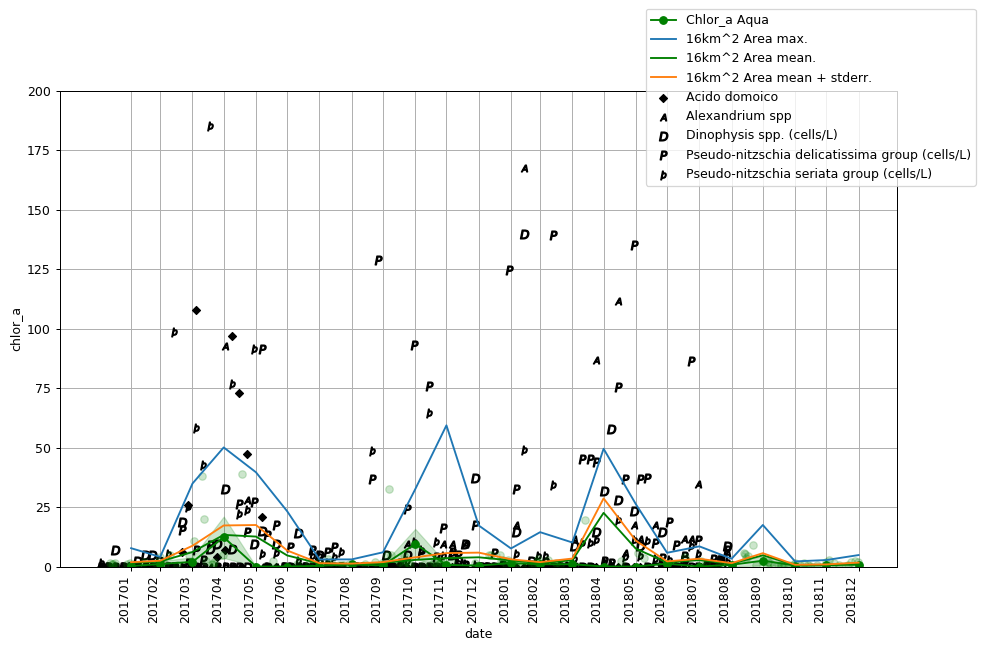

In [45]:
# lat,lon = (34.408,-119.685)
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams["figure.dpi"] = 90

plotTimeseries(lat,lon, "green", "Chlor_a Aqua", monthlymeans=mmAchl, stderr=mstdAchl, xa = xa_Achl)

#plotTimeseries(lat,lon, "red", "Chlor_a Terra", monthlymeans=mmTchl, stderr=mstdTchl, xa = xa_Tchl)
plt.title("Serie temporal de clorofila ({}, {})".format(lat,lon))
#plt.yscale("symlog")
plt.ylim([0,200])
plt.grid(True)
ax = plt.gca()
ax.set_axisbelow(True)

temp = scoos[(scoos.latitude == lat) & (scoos.date > pd.to_datetime("2016-12-31"))]
plt.scatter(temp.date, 100*temp["Domoic Acid (ng/mL)"], s=20, color="black", marker="D", label="Acido domoico")
plt.scatter(temp.date, 0.01*temp["Alexandrium spp. (cells/L)"], s=30, color="black", marker="$A$", label="Alexandrium spp")
plt.scatter(temp.date, 0.01*temp['Dinophysis spp. (cells/L)'], s=50, color="black", marker="$D$", label='Dinophysis spp. (cells/L)')
plt.scatter(temp.date, 0.0015*temp['Pseudo-nitzschia delicatissima group (cells/L)'], s=50, color="black", marker="$P$", label='Pseudo-nitzschia delicatissima group (cells/L)')
plt.scatter(temp.date, 0.0007*temp['Pseudo-nitzschia seriata group (cells/L)'], s=50, color="black", marker="$þ$", label='Pseudo-nitzschia seriata group (cells/L)')

monthAmax.plot(label="16km^2 Area max.")
monthAmean.plot(color="green", label="16km^2 Area mean.")
(monthAste + monthAmean).plot(label="16km^2 Area mean + stderr.")

plt.legend(loc=(0.7,0.8))

plt.xticks(rotation=90)


(array([736360., 736388., 736419., 736449., 736480., 736510., 736541.,
        736572., 736602., 736633., 736663., 736694., 736725., 736753.,
        736784., 736814., 736845., 736875., 736906., 736937., 736967.,
        736998., 737028., 737059.]), <a list of 24 Text xticklabel objects>)

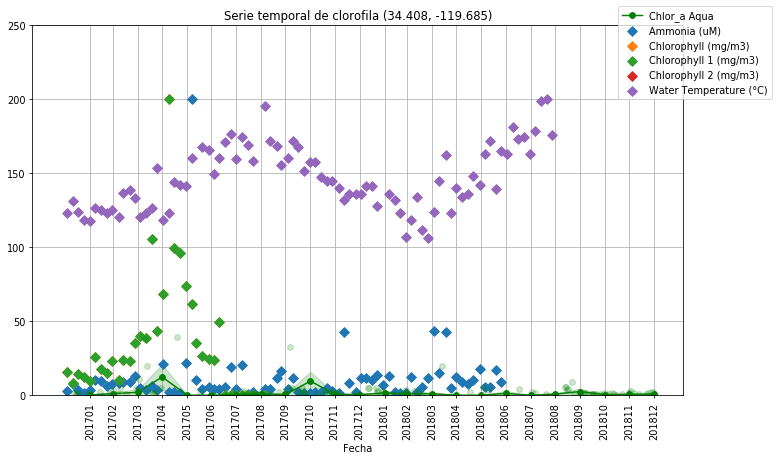

In [38]:
lat,lon = (34.408,-119.685)
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams["figure.dpi"] = 70

plotTimeseries(lat,lon, "green", "Chlor_a Aqua", monthlymeans=mmAchl, stderr=mstdAchl, xa = xa_Achl)

#plotTimeseries(lat,lon, "red", "Chlor_a Terra", monthlymeans=mmTchl, stderr=mstdTchl, xa = xa_Tchl)
plt.title("Serie temporal de clorofila ({}, {})".format(lat,lon))
#plt.yscale("symlog")
plt.ylim([0,250])
plt.grid(True)
ax = plt.gca()
ax.set_axisbelow(True)

temp = scoos[(scoos.latitude == lat) & (scoos.date > pd.to_datetime("2016-12-31"))]
keyspre = """Ammonia (uM)
Chlorophyll (mg/m3)
Chlorophyll 1 (mg/m3)
Chlorophyll 2 (mg/m3)
Water Temperature (°C)"""
for key in keyspre.split("\n"):
    plt.scatter(temp.date, 200*temp[key]/temp[key].max(), s=50, marker="D", label=key)

plt.legend(loc=(0.9,0.8))

plt.xticks(rotation=90)


In [40]:
domoForecast = xa.open_dataset("../../CaliforniaData/HAB_CELLULAR_DOMOIC_ACID_FORECAST.nc")

In [29]:
domoForecast

<xarray.Dataset>
Dimensions:                        (latitude: 391, longitude: 351, time: 3)
Coordinates:
  * time                           (time) datetime64[ns] 2019-05-05 ... 2019-05-07
  * latitude                       (latitude) float32 31.3 31.33 ... 42.97 43.0
  * longitude                      (longitude) float32 232.5 232.53 ... 243.0
Data variables:
    forecast_cellular_domoic_acid  (time, longitude, latitude) float32 ...
Attributes:
    acknowledgment:                  This pre-operational project builds on f...
    cdm_data_type:                   Grid
    comment:                         Data produced by Dr. Clarissa Anderson (...
    contributor_name:                Fred Bahr, Clarissa Anderson, Raphe Kudela
    contributor_role:                author,principal investigator, principal...
    Conventions:                     CF-1.6
    creator_name:                    Clarissa Anderson
    creator_email:                   clrander@ucsc.edu
    creator_url:               